### Part 3: Model the Data

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np
import shapely
from IPython.core.pylabtools import figsize
figsize(8,8)

In [3]:
# code framework via
# https://github.com/willgeary/PythonSpatialDataScience/blob/main/notebook.ipynb

#### final column cleaning 

In [4]:
# brooklyn and bed stuy census tracts indicators
brooklyn_inds = gpd.read_file('../data/final/brooklyn_inds.geojson')
bedstuy_inds = gpd.read_file('../data/final/bedstuy_inds.geojson')

In [5]:
brooklyn_inds.head()

,GEOID,inc_change_x,yt_change_x,NAME_x,variable_x,num_built_x,moe_x,area_x,norm_x,num_stores_x,...,num_built_y,moe_y,area_y,norm_y,num_stores_y,has_store_y,index_right,Name,fresh_zone,geometry
0,36047057800,-26443.809,-0.040,"Census Tract 578, Kings County, New York",B25034_002,15.0,17.0,0.066508,225.537924,0.0,...,15.0,17.0,0.066508,225.537924,0.0,0.0,2.0,Discretionary tax incentives,1.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,-13708.971,0.088,"Census Tract 589, Kings County, New York",B25034_002,0.0,12.0,0.181851,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,-6246.873,-0.039,"Census Tract 370, Kings County, New York",B25034_002,0.0,12.0,0.129682,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,44217.558,0.238,"Census Tract 199, Kings County, New York",B25034_002,23.0,26.0,0.072937,315.339872,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,6362.709,0.024,"Census Tract 400, Kings County, New York",B25034_002,0.0,12.0,0.074155,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."


In [6]:
bedstuy_inds.head()

,GEOID,inc_change_x,yt_change_x,NAME_x,variable_x,num_built_x,moe_x,area_x,norm_x,num_stores_x,...,num_built_y,moe_y,area_y,norm_y,num_stores_y,has_store_y,index_right,Name,fresh_zone,geometry
0,36047030500,25923.779,0.240,"Census Tract 305, Kings County, New York",B25034_002,95.0,53.0,0.117968,805.300900,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.95531 40.67927, -73.95532 40.679..."
1,36047022100,6242.776,0.222,"Census Tract 221, Kings County, New York",B25034_002,26.0,24.0,0.064962,400.232160,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.95531 40.67927, -73.95300 40.678..."
2,36047031500,18519.973,0.297,"Census Tract 315, Kings County, New York",B25034_002,0.0,12.0,0.069708,0.000000,0.0,...,0.0,12.0,0.069708,0.0,0.0,0.0,1.0,Zoning and discretionary tax incentives,1.0,"POLYGON ((-73.94968 40.67857, -73.94691 40.678..."
3,36047024700,4580.187,0.163,"Census Tract 247, Kings County, New York",B25034_002,5.0,10.0,0.071271,70.155168,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.94956 40.68039, -73.94627 40.680..."
4,36047022700,50707.211,0.164,"Census Tract 227, Kings County, New York",B25034_002,224.0,85.0,0.091389,2451.057497,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,"POLYGON ((-73.95611 40.68333, -73.95395 40.683..."


In [7]:
brooklyn_inds['has_store_x'].value_counts()

0.0    744
1.0     16
Name: has_store_x, dtype: int64

In [8]:
# incorrect category field
brooklyn_inds['has_store_y'].value_counts()

0.0    261
1.0      9
Name: has_store_y, dtype: int64

In [9]:
# update column names
brooklyn_inds.columns

Index(['GEOID', 'inc_change_x', 'yt_change_x', 'NAME_x', 'variable_x',
       'num_built_x', 'moe_x', 'area_x', 'norm_x', 'num_stores_x',
       'has_store_x', 'inc_change_y', 'yt_change_y', 'NAME_y', 'variable_y',
       'num_built_y', 'moe_y', 'area_y', 'norm_y', 'num_stores_y',
       'has_store_y', 'index_right', 'Name', 'fresh_zone', 'geometry'],
      dtype='object')

In [10]:
brooklyn_inds = brooklyn_inds.rename(columns={'inc_change_x':'inc_change', 'yt_change_x':'yt_change', 'norm_x' : 'new_built', 'has_store_x': 'fresh_store'})
bedstuy_inds = bedstuy_inds.rename(columns={'inc_change_x':'inc_change', 'yt_change_x':'yt_change', 'norm_x' : 'new_built', 'has_store_x': 'fresh_store'})

In [11]:
bedstuy_inds.columns

Index(['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_built_x', 'moe_x', 'area_x', 'new_built', 'num_stores_x',
       'fresh_store', 'inc_change_y', 'yt_change_y', 'NAME_y', 'variable_y',
       'num_built_y', 'moe_y', 'area_y', 'norm_y', 'num_stores_y',
       'has_store_y', 'index_right', 'Name', 'fresh_zone', 'geometry'],
      dtype='object')

In [12]:
bk_columns_to_drop = ['inc_change_y', 'yt_change_y', 'num_built_y', 'moe_y', 'area_y', 'norm_y', 'has_store_y']
bs_columns_to_drop = ['inc_change_y', 'yt_change_y', 'num_built_y', 'moe_y', 'area_y', 'norm_y', 'has_store_y']
brooklyn_inds = brooklyn_inds.drop(bk_columns_to_drop, axis=1)
bedstuy_inds = bedstuy_inds.drop(bs_columns_to_drop, axis=1)

In [13]:
brooklyn_inds.columns

Index(['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_built_x', 'moe_x', 'area_x', 'new_built', 'num_stores_x',
       'fresh_store', 'NAME_y', 'variable_y', 'num_stores_y', 'index_right',
       'Name', 'fresh_zone', 'geometry'],
      dtype='object')

In [14]:
# built seperate dataframe with indictaor and category columns
bk_indicators = brooklyn_inds[['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_stores_x', 'num_built_x', 'moe_x', 'area_x', 'new_built', 'fresh_store', 'fresh_zone', 'geometry']]

In [15]:
bk_indicators.head()

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry
0,36047057800,-26443.809,-0.040,"Census Tract 578, Kings County, New York",B25034_002,0.0,15.0,17.0,0.066508,225.537924,0.0,1.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,-13708.971,0.088,"Census Tract 589, Kings County, New York",B25034_002,0.0,0.0,12.0,0.181851,0.000000,0.0,0.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,-6246.873,-0.039,"Census Tract 370, Kings County, New York",B25034_002,0.0,0.0,12.0,0.129682,0.000000,0.0,0.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,44217.558,0.238,"Census Tract 199, Kings County, New York",B25034_002,0.0,23.0,26.0,0.072937,315.339872,0.0,0.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,6362.709,0.024,"Census Tract 400, Kings County, New York",B25034_002,0.0,0.0,12.0,0.074155,0.000000,0.0,0.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."


In [16]:
bk_indicators['num_stores_x'].value_counts()

0.0    744
1.0     12
2.0      3
3.0      1
Name: num_stores_x, dtype: int64

In [17]:
bs_indicators = bedstuy_inds[['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_stores_x', 'num_built_x', 'moe_x', 'area_x', 'new_built', 'fresh_store', 'fresh_zone', 'geometry']]

In [18]:
bs_indicators.head()

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry
0,36047030500,25923.779,0.240,"Census Tract 305, Kings County, New York",B25034_002,0.0,95.0,53.0,0.117968,805.300900,0.0,0.0,"POLYGON ((-73.95531 40.67927, -73.95532 40.679..."
1,36047022100,6242.776,0.222,"Census Tract 221, Kings County, New York",B25034_002,0.0,26.0,24.0,0.064962,400.232160,0.0,0.0,"POLYGON ((-73.95531 40.67927, -73.95300 40.678..."
2,36047031500,18519.973,0.297,"Census Tract 315, Kings County, New York",B25034_002,0.0,0.0,12.0,0.069708,0.000000,0.0,1.0,"POLYGON ((-73.94968 40.67857, -73.94691 40.678..."
3,36047024700,4580.187,0.163,"Census Tract 247, Kings County, New York",B25034_002,0.0,5.0,10.0,0.071271,70.155168,0.0,0.0,"POLYGON ((-73.94956 40.68039, -73.94627 40.680..."
4,36047022700,50707.211,0.164,"Census Tract 227, Kings County, New York",B25034_002,0.0,224.0,85.0,0.091389,2451.057497,0.0,0.0,"POLYGON ((-73.95611 40.68333, -73.95395 40.683..."


In [19]:
bs_indicators['num_stores_x'].value_counts()

0.0    58
1.0     4
2.0     3
3.0     1
Name: num_stores_x, dtype: int64

### Part I: Local Morans I

In [ ]:
# grid and rasterize functions are used to create a boundary for point data - not needed 

In [181]:
bk_indicators.head()

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry
0,36047057800,-26443.809,-0.040,"Census Tract 578, Kings County, New York",B25034_002,0.0,15.0,17.0,0.066508,225.537924,0.0,1.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,-13708.971,0.088,"Census Tract 589, Kings County, New York",B25034_002,0.0,0.0,12.0,0.181851,0.000000,0.0,0.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,-6246.873,-0.039,"Census Tract 370, Kings County, New York",B25034_002,0.0,0.0,12.0,0.129682,0.000000,0.0,0.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,44217.558,0.238,"Census Tract 199, Kings County, New York",B25034_002,0.0,23.0,26.0,0.072937,315.339872,0.0,0.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,6362.709,0.024,"Census Tract 400, Kings County, New York",B25034_002,0.0,0.0,12.0,0.074155,0.000000,0.0,0.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."


<Axes: >

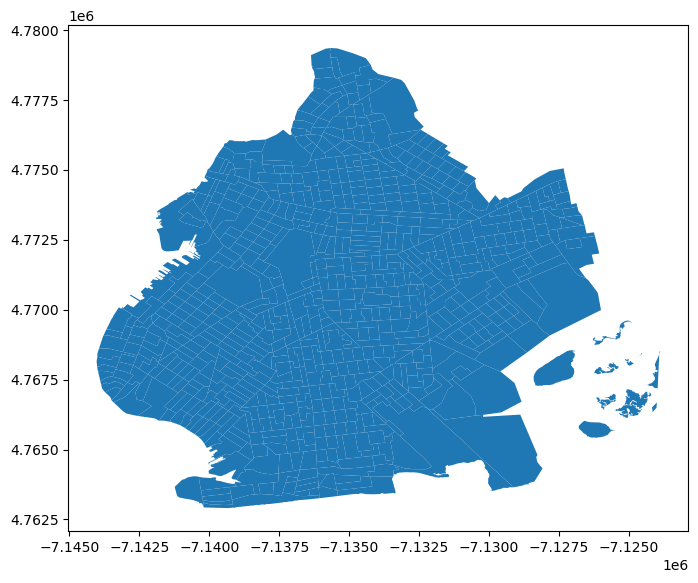

In [83]:
bk_indicators.plot()

In [20]:
# create fresh stores per square mile column
bk_indicators.head()
bk_indicators['fresh_store_norm'] = bk_indicators['num_stores_x'] / bk_indicators['area_x']

C:\Users\abeme\miniconda3_2\envs\info615\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
bk_indicators['fresh_store_norm'].value_counts()

0.000000     744
7.933587       1
34.778942      1
32.279545      1
17.090604      1
24.173360      1
14.839723      1
15.198526      1
17.615109      1
17.438373      1
18.075180      1
25.975685      1
16.233073      1
28.622875      1
10.508861      1
14.223732      1
14.958120      1
Name: fresh_store_norm, dtype: int64

In [22]:
# for all relevant columns
bk_indicators_no_null = bk_indicators.dropna(subset=['yt_change', 'inc_change', 'new_built'])

In [23]:
bk_indicators_no_null.columns

Index(['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_stores_x', 'num_built_x', 'moe_x', 'area_x', 'new_built',
       'fresh_store', 'fresh_zone', 'geometry', 'fresh_store_norm'],
      dtype='object')

In [24]:
from pysal.lib import weights

In [25]:
w = weights.Queen.from_dataframe(bk_indicators_no_null)

In [26]:
w.transform = 'R'

In [27]:
w.weights

{0: [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 1: [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 2: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 3: [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 4: [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 5: [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 6: [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 7: [0.2, 0.2, 0.

In [28]:
from pysal.explore import esda

C:\Users\abeme\miniconda3_2\envs\info615\lib\site-packages\spaghetti\network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [29]:
# run on fresh stores per square mile, global moran
moran = esda.moran.Moran(bk_indicators_no_null['fresh_store_norm'], w, permutations=9999)

In [30]:
moran.I

0.0627372974350248

In [31]:
# p > 0.005, not statistically signifcant 
moran.p_sim

0.0139

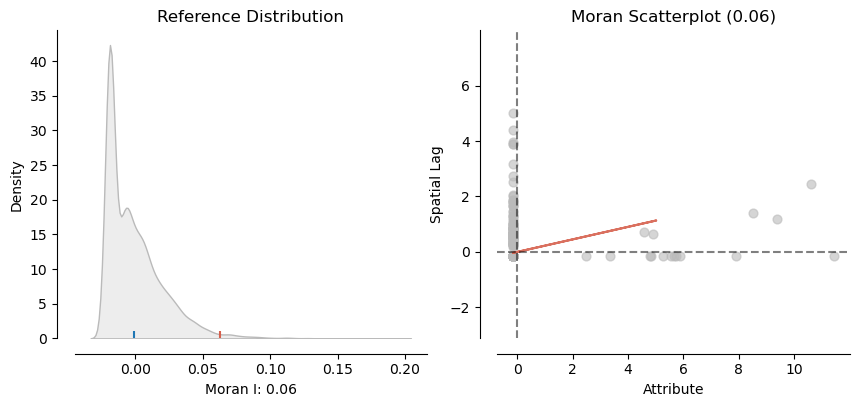

In [32]:
# a lot of zeros within the fresh_Store_norm column
from splot.esda import plot_moran
plot_moran(moran)
plt.savefig('../stats/moran_charts.png', dpi=300);

In [34]:
# local moran
local_moran = esda.moran.Moran_Local(bk_indicators_no_null['fresh_store_norm'], w)

In [35]:
local_moran.Is

array([ 1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02, -7.80775559e-01, -1.17050279e-01,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02, -9.52665764e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02,  1.90825212e-02,
        1.90825212e-02,  1.90825212e-02,  1.90825212e-02, -7.89309910e-02,
        1.90825212e-02,  

In [36]:
local_moran.p_sim

array([0.151, 0.001, 0.001, 0.001, 0.151, 0.151, 0.001, 0.068, 0.146,
       0.001, 0.146, 0.001, 0.001, 0.001, 0.146, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.146, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.146, 0.001, 0.146, 0.001, 0.001, 0.146,
       0.001, 0.079, 0.001, 0.001, 0.146, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.146, 0.091, 0.001, 0.001,
       0.001, 0.146, 0.001, 0.146, 0.001, 0.146, 0.001, 0.001, 0.058,
       0.001, 0.075, 0.001, 0.001, 0.066, 0.139, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.139, 0.001, 0.001, 0.139, 0.001, 0.044, 0.001,
       0.001, 0.139, 0.001, 0.001, 0.001, 0.035, 0.139, 0.001, 0.001,
       0.051, 0.001, 0.001, 0.139, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.139, 0.018, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.088,
       0.001, 0.052, 0.134, 0.001, 0.103, 0.001, 0.001, 0.001, 0.001,
       0.139, 0.028, 0.001, 0.001, 0.001, 0.001, 0.117, 0.001, 0.001,
       0.139, 0.001,

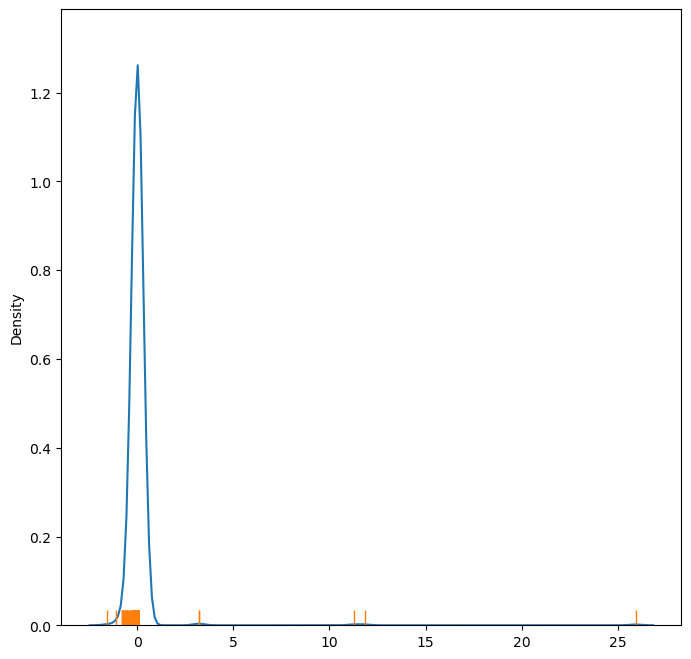

In [37]:
ax = sns.kdeplot(local_moran.Is)
sns.rugplot(local_moran.Is, ax=ax)
plt.savefig('../stats/local_moran_chart.png', dpi=300);

In [39]:
import esda
from splot import esda as esdaplot

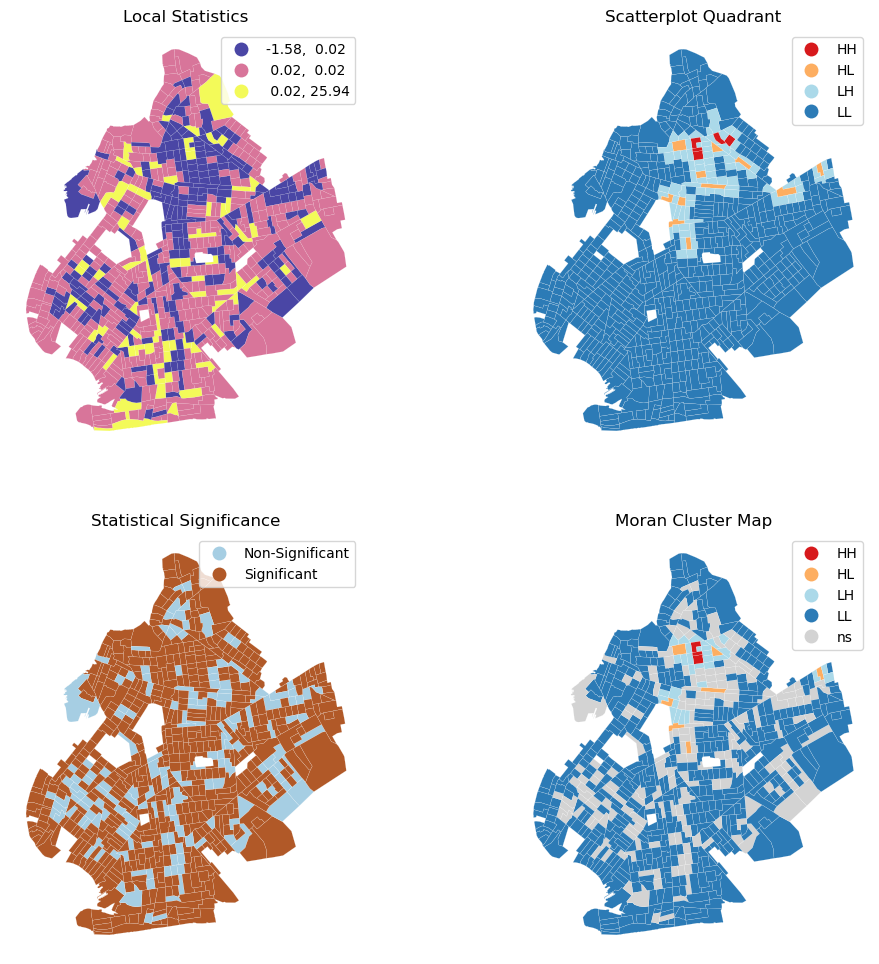

In [40]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs = axs.flatten()

# Subplot 1: Choropleth of local statistics
ax = axs[0]
bk_indicators_no_null.assign(Is=local_moran.Is).plot(column="Is", cmap="plasma", scheme="quantiles", k=5, edgecolor="white", linewidth=0.1, alpha=0.75, legend=True, ax=ax)

# Subplot 2: Quadrant categories
ax = axs[1]
esdaplot.lisa_cluster(local_moran, bk_indicators_no_null.to_crs(3857), p=1, ax=ax)

# Subplot 3: Significance map (alpha=0.10)
ax = axs[2]
labels = pd.Series(1 * (local_moran.p_sim < 0.10), index=bk_indicators_no_null.index).map({1: "Significant", 0: "Non-Significant"})
bk_indicators_no_null.assign(cl=labels).plot(column="cl", categorical=True, k=2, cmap="Paired", linewidth=0.1, edgecolor="white", legend=True, ax=ax)

# Subplot 4: Cluster map
ax = axs[3]
esdaplot.lisa_cluster(local_moran, bk_indicators_no_null.to_crs(3857), p=0.05, ax=ax)

# Figure styling #
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(["Local Statistics","Scatterplot Quadrant","Statistical Significance","Moran Cluster Map"][i])
    
plt.savefig('../stats/local_moran_maps.png', dpi=300);

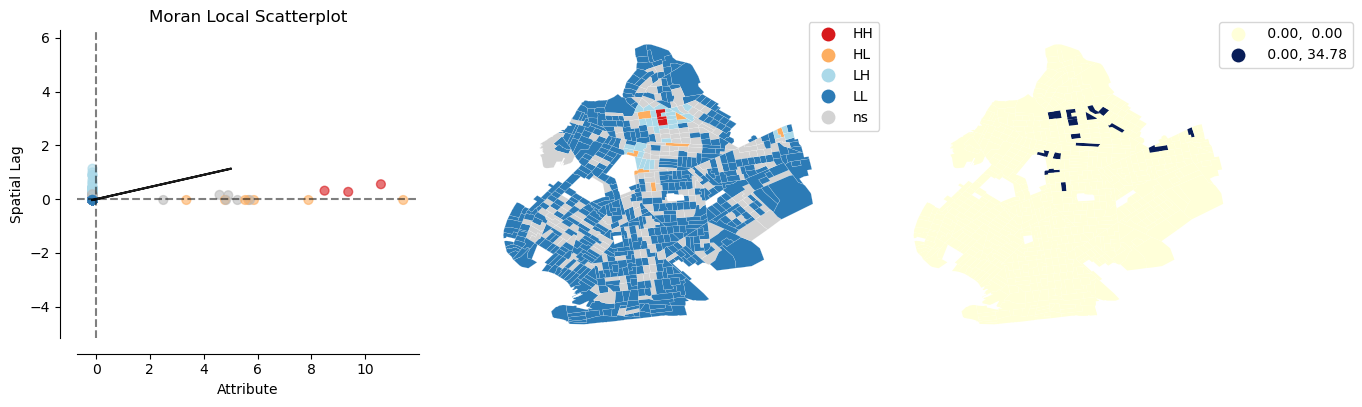

In [41]:
esdaplot.plot_local_autocorrelation(local_moran, bk_indicators_no_null, 'fresh_store_norm', p=0.05)
plt.savefig('../stats/local_moran_chartandmaps.png', dpi=300);

In [42]:
import libpysal

In [43]:
# Create spatial weights matrix
w_2 = libpysal.weights.KNN.from_dataframe(bk_indicators_no_null,k=8)

In [44]:
# Calculate the local Moran's I statistics and assign them
# along with their associated p-values and quadrants to each zone
local_moran_2 = esda.moran.Moran_Local(bk_indicators_no_null['fresh_store_norm'], w_2)
bk_indicators_no_null['local_moran_i'] = local_moran_2.Is
bk_indicators_no_null['local_moran_p_value'] = local_moran_2.p_sim
bk_indicators_no_null['local_moran_quadrant'] = local_moran_2.q

In [45]:
# Get the statistically significant clusters and outliers at alpha = 0.10
alpha = 0.10
hotspots = bk_indicators_no_null.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 1")
coldspots = bk_indicators_no_null.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 3")
doughnuts = bk_indicators_no_null.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 2")
diamonds = bk_indicators_no_null.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 4")
not_significant = bk_indicators_no_null.query(f"local_moran_p_value >= {alpha}")

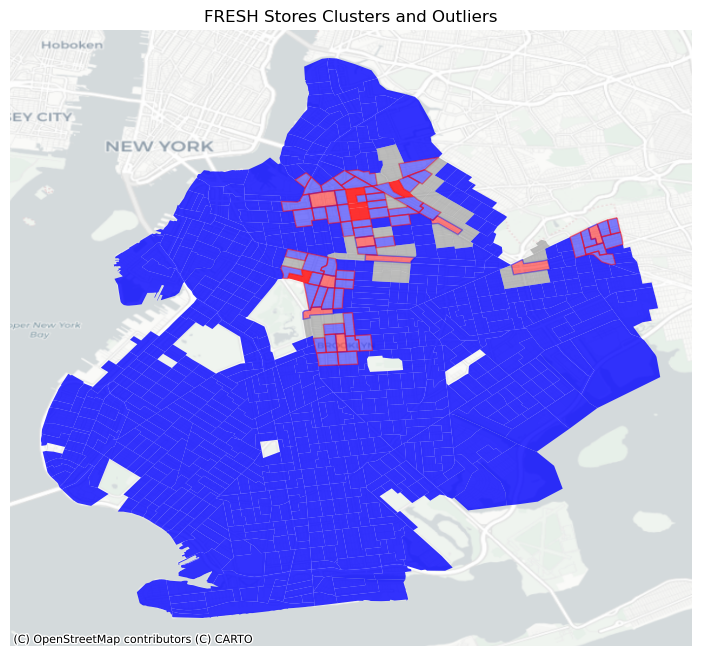

In [46]:
# Plot the hot spots, cold spots, diamonds and doughnuts.
fig, ax = plt.subplots(figsize=(16,8))
hotspots.plot(color='red',alpha=0.8, ax=ax, label='Hot Spot')
coldspots.plot(color='blue', alpha=0.8, ax=ax, label='Cold Spot')
diamonds.plot(color='red', edgecolor='blue', alpha=0.5, ax=ax, label='Diamonds')
doughnuts.plot(color='blue', edgecolor='red', alpha=0.5, ax=ax, label='Doughnuts')
not_significant.plot(color='gray', alpha=0.5, label='Not Significant', ax=ax)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=4326)
ax.set_title('FRESH Stores Clusters and Outliers')
ax.axis('off')
plt.savefig('../stats/cluster_map.png', dpi=300);

### Part II: Logistic Regression Modeling 

In [48]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
bk_indicators.head()

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_built_x,moe_x,area_x,2014built,fresh_store,fresh_zone,geometry
0,36047057800,-26443.809,-0.040,"Census Tract 578, Kings County, New York",B25034_002,15.0,17.0,0.066508,225.537924,0.0,1.0,"POLYGON ((-7135453.466 4765936.584, -7135337.3..."
1,36047058900,-13708.971,0.088,"Census Tract 589, Kings County, New York",B25034_002,0.0,12.0,0.181851,0.000000,0.0,0.0,"POLYGON ((-7134599.442 4778387.332, -7134640.5..."
2,36047037000,-6246.873,-0.039,"Census Tract 370, Kings County, New York",B25034_002,0.0,12.0,0.129682,0.000000,0.0,0.0,"POLYGON ((-7136669.580 4764707.328, -7136636.8..."
3,36047019900,44217.558,0.238,"Census Tract 199, Kings County, New York",B25034_002,23.0,26.0,0.072937,315.339872,0.0,0.0,"POLYGON ((-7136848.252 4774212.587, -7136658.3..."
4,36047040000,6362.709,0.024,"Census Tract 400, Kings County, New York",B25034_002,0.0,12.0,0.074155,0.000000,0.0,0.0,"POLYGON ((-7138041.322 4765648.439, -7137992.5..."


In [82]:
bs_indicators.head()

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_built_x,moe_x,area_x,2014built,fresh_store,fresh_zone,geometry
0,36047030500,25923.779,0.240,"Census Tract 305, Kings County, New York",B25034_002,95.0,53.0,0.117968,805.300900,0.0,0.0,"POLYGON ((-73.95531 40.67927, -73.95532 40.679..."
1,36047022100,6242.776,0.222,"Census Tract 221, Kings County, New York",B25034_002,26.0,24.0,0.064962,400.232160,0.0,0.0,"POLYGON ((-73.95531 40.67927, -73.95300 40.678..."
2,36047031500,18519.973,0.297,"Census Tract 315, Kings County, New York",B25034_002,0.0,12.0,0.069708,0.000000,0.0,1.0,"POLYGON ((-73.94968 40.67857, -73.94691 40.678..."
3,36047024700,4580.187,0.163,"Census Tract 247, Kings County, New York",B25034_002,5.0,10.0,0.071271,70.155168,0.0,0.0,"POLYGON ((-73.94956 40.68039, -73.94627 40.680..."
4,36047022700,50707.211,0.164,"Census Tract 227, Kings County, New York",B25034_002,224.0,85.0,0.091389,2451.057497,0.0,0.0,"POLYGON ((-73.95611 40.68333, -73.95395 40.683..."


In [210]:
bk_indicators_no_null.columns

Index(['GEOID', 'inc_change', 'yt_change', 'NAME_x', 'variable_x',
       'num_stores_x', 'num_built_x', 'moe_x', 'area_x', 'new_built',
       'fresh_store', 'fresh_zone', 'geometry', 'fresh_store_norm',
       'local_moran_i', 'local_moran_p_value', 'local_moran_quadrant'],
      dtype='object')

#### in order to test the following models, 2 census rows need to be selected out. for the purposes of this project, I will be selecting a row in a census tract that is gentrifying, and I will select another row that is not seeing these changes. 

In [232]:
# compare white, income and buildings to pick out gent row 
bk_indicators_no_null.sort_values(by='yt_change', ascending=False).head(1)

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
354,36047008000,16957.378,0.32,"Census Tract 80, Kings County, New York",B25034_002,0.0,0.0,12.0,0.053714,0.0,0.0,1.0,"POLYGON ((-74.01148 40.65036, -74.01091 40.650...",0.0,0.019083,0.001,3


In [233]:
bk_indicators_no_null.sort_values(by='inc_change', ascending=False).head(1)

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
534,36047003700,71385.75,-0.021,"Census Tract 37, Kings County, New York",B25034_002,0.0,568.0,83.0,0.063901,8888.799711,0.0,0.0,"POLYGON ((-73.98893 40.69209, -73.98735 40.691...",0.0,0.019083,0.001,3


In [239]:
# index 520 / census tract 129.02 will be our gentrification test row
# new building, income, yt % inc. index 520 is a full census tract within brooklyn (index 45 is not)
bk_indicators_no_null.sort_values(by='new_built', ascending=False).head(10)

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
45,36047001500,11772.711,0.004,"Census Tract 15, Kings County, New York",B25034_002,0.0,1285.0,131.0,0.116834,10998.521337,0.0,0.0,"POLYGON ((-73.98473 40.69613, -73.98496 40.698...",0.0,0.019083,0.001,3
534,36047003700,71385.750,-0.021,"Census Tract 37, Kings County, New York",B25034_002,0.0,568.0,83.0,0.063901,8888.799711,0.0,0.0,"POLYGON ((-73.98893 40.69209, -73.98735 40.691...",0.0,0.019083,0.001,3
106,36047003300,40594.616,-0.088,"Census Tract 33, Kings County, New York",B25034_002,0.0,473.0,96.0,0.063219,7481.935151,0.0,0.0,"POLYGON ((-73.97862 40.68983, -73.97710 40.689...",0.0,0.019083,0.001,3
101,36047055500,61159.810,-0.126,"Census Tract 555, Kings County, New York",B25034_002,0.0,713.0,142.0,0.101353,7034.823148,0.0,0.0,"POLYGON ((-73.96651 40.71792, -73.96631 40.718...",0.0,0.019083,0.001,3
529,36047054700,13730.290,-0.075,"Census Tract 547, Kings County, New York",B25034_002,0.0,250.0,95.0,0.059615,4193.558100,0.0,0.0,"POLYGON ((-73.96961 40.71016, -73.96852 40.710...",0.0,0.019083,0.001,3
520,36047012902,26533.852,0.016,"Census Tract 129.02, Kings County, New York",B25034_002,0.0,171.0,52.0,0.050084,3414.274187,0.0,0.0,"POLYGON ((-73.97781 40.68031, -73.97702 40.681...",0.0,0.019083,0.001,3
530,36047054900,46562.366,-0.084,"Census Tract 549, Kings County, New York",B25034_002,0.0,232.0,91.0,0.078162,2968.189371,0.0,0.0,"POLYGON ((-73.96897 40.71255, -73.96894 40.712...",0.0,0.019083,0.001,3
733,36047003500,59951.523,0.313,"Census Tract 35, Kings County, New York",B25034_002,0.0,147.0,41.0,0.051013,2881.631315,0.0,0.0,"POLYGON ((-73.97654 40.68699, -73.97559 40.687...",0.0,0.019083,0.001,3
518,36047051500,65086.045,-0.135,"Census Tract 515, Kings County, New York",B25034_002,0.0,191.0,61.0,0.071615,2667.026096,0.0,0.0,"POLYGON ((-73.95065 40.72170, -73.94908 40.722...",0.0,0.019083,0.001,3
736,36047051900,63256.169,0.002,"Census Tract 519, Kings County, New York",B25034_002,0.0,263.0,133.0,0.106164,2477.304939,0.0,0.0,"POLYGON ((-73.95822 40.71537, -73.95644 40.717...",0.0,0.019083,0.001,3


In [242]:
test_g = bk_indicators_no_null.loc[[520]]
test_g

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
520,36047012902,26533.852,0.016,"Census Tract 129.02, Kings County, New York",B25034_002,0.0,171.0,52.0,0.050084,3414.274187,0.0,0.0,"POLYGON ((-73.97781 40.68031, -73.97702 40.681...",0.0,0.019083,0.001,3


In [344]:
# index 63 / census tract 374.02 will be 'not gentrified' test variable. while being in the fresh zone,
# this census tract has seen no new builings, inc. in white population, or inc in income.
# this census tract is located in gravesend next to the MTA coney island yard.
bk_indicators_no_null.sort_values(by='yt_change').head(10)

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
8,36047019800,19848.148,-0.395,"Census Tract 198, Kings County, New York",B25034_002,0.0,0.0,12.0,0.051996,0.000000,0.0,0.0,"POLYGON ((-74.00743 40.62030, -74.00564 40.622...",0.0,0.019083,0.001,3
753,36047026600,-8778.074,-0.342,"Census Tract 266, Kings County, New York",B25034_002,0.0,0.0,12.0,0.064050,0.000000,0.0,0.0,"POLYGON ((-73.99365 40.61569, -73.99160 40.614...",0.0,0.019083,0.001,3
63,36047037402,-3447.838,-0.316,"Census Tract 374.02, Kings County, New York",B25034_002,0.0,0.0,12.0,0.116672,0.000000,0.0,1.0,"POLYGON ((-73.97423 40.58871, -73.97422 40.590...",0.0,0.019083,0.001,3
271,36047029800,448.603,-0.285,"Census Tract 298, Kings County, New York",B25034_002,0.0,5.0,19.0,0.085237,58.660264,0.0,1.0,"POLYGON ((-73.98981 40.60230, -73.98922 40.602...",0.0,0.019083,0.001,3
512,36047120200,-26829.250,-0.273,"Census Tract 1202, Kings County, New York",B25034_002,0.0,0.0,12.0,0.058971,0.000000,0.0,0.0,"POLYGON ((-73.86855 40.67721, -73.86670 40.677...",0.0,0.019083,0.001,3
157,36047036200,10211.086,-0.264,"Census Tract 362, Kings County, New York",B25034_002,0.0,41.0,57.0,0.065701,624.034490,0.0,1.0,"POLYGON ((-73.96582 40.57881, -73.96401 40.579...",0.0,0.019083,0.001,3
425,36047020800,4052.132,-0.261,"Census Tract 208, Kings County, New York",B25034_002,0.0,0.0,12.0,0.055343,0.000000,0.0,1.0,"POLYGON ((-74.01214 40.62868, -74.01050 40.627...",0.0,0.019083,0.001,3
322,36047045600,8728.723,-0.259,"Census Tract 456, Kings County, New York",B25034_002,0.0,0.0,12.0,0.059358,0.000000,0.0,1.0,"POLYGON ((-73.96800 40.62933, -73.96708 40.629...",0.0,0.019083,0.001,3
55,36047069800,31274.750,-0.254,"Census Tract 698, Kings County, New York",B25034_002,0.0,0.0,12.0,0.240150,0.000000,0.0,0.0,"POLYGON ((-73.91901 40.61212, -73.91610 40.614...",0.0,0.019083,0.001,3
694,36047011800,7686.182,-0.254,"Census Tract 118, Kings County, New York",B25034_002,0.0,70.0,37.0,0.084636,827.066739,0.0,1.0,"POLYGON ((-74.01515 40.63701, -74.01457 40.637...",0.0,0.019083,0.001,3


In [346]:
test_ng = bk_indicators_no_null.loc[[63]]
test_ng

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
63,36047037402,-3447.838,-0.316,"Census Tract 374.02, Kings County, New York",B25034_002,0.0,0.0,12.0,0.116672,0.0,0.0,1.0,"POLYGON ((-73.97423 40.58871, -73.97422 40.590...",0.0,0.019083,0.001,3


## MODEL 1: FRESH_STORE BROOKLYN MODEL

In [52]:
# logistic reg pt.1: from bk_indicators, where y is fresh_zone and x is inc_change, yt_change, 2014built
formula_1 = "fresh_store ~ inc_change + yt_change + new_built"
model_1 = smf.logit(formula_1, data=bk_indicators_no_null).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.095607
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fresh_store   No. Observations:                  745
Model:                          Logit   Df Residuals:                      741
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 May 2023   Pseudo R-squ.:                 0.07832
Time:                        12:55:39   Log-Likelihood:                -71.227
converged:                       True   LL-Null:                       -77.280
Covariance Type:            nonrobust   LLR p-value:                  0.007031
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1012      0.337    -12.183      0.000      -4.761      -3.441
inc_change  -5.72e-06   1.48e-05     -0.386      0.699   -3.48e-05    2.33e-05
yt_change      7.0766      2.308      3.067      0.002       2.554      11.600
new_built      0.0003      0.000      1.949      0.051   -1.81e-06       0.001
==============================================================================
"""

In [229]:
model_4.pred_table(threshold=.5)
# true negative = 729 (no stores)
# false positive = 0 (stores)
# false negative = 16 (no stores)
# true positive = 0 (stores), so many census tracts in BK don't have fresh stores
# sum of the true > sum of the false 
# confusion matrix is hard to articulate with this dataset, will leave out of presentation

array([[729.,   0.],
       [ 16.,   0.]])

### testing the fresh_store model on demographic characteristics 

#### test dataset #1: gentrified census tract

In [244]:
test_g

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
520,36047012902,26533.852,0.016,"Census Tract 129.02, Kings County, New York",B25034_002,0.0,171.0,52.0,0.050084,3414.274187,0.0,0.0,"POLYGON ((-73.97781 40.68031, -73.97702 40.681...",0.0,0.019083,0.001,3


#### test dataset #2: non-gentrified census tract

In [347]:
test_ng

,GEOID,inc_change,yt_change,NAME_x,variable_x,num_stores_x,num_built_x,moe_x,area_x,new_built,fresh_store,fresh_zone,geometry,fresh_store_norm,local_moran_i,local_moran_p_value,local_moran_quadrant
63,36047037402,-3447.838,-0.316,"Census Tract 374.02, Kings County, New York",B25034_002,0.0,0.0,12.0,0.116672,0.0,0.0,1.0,"POLYGON ((-73.97423 40.58871, -73.97422 40.590...",0.0,0.019083,0.001,3


#### change in % of white population

##### for gentrified census tract

In [245]:
test_g_yt = test_g.copy()

In [247]:
model_1.predict(test_g_yt)

520    0.044083
dtype: float64

In [249]:
# create a for loop that tests likelihood of a fresh zone based on incremental changes in yt_change variable 
yt_list_1_g = [-1, -.9, -.8, -.7, -.6, -.5, -.4,-.3,-.2,-.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
yt_predictions_1_g = []

In [250]:
for i in yt_list_1_g:
    testdf = test_g_yt.copy()
    testdf['yt_change'] = i
    yt_predictions_1_g.append(model_1.predict(testdf).values[0])  

In [251]:
pd.DataFrame(yt_predictions_1_g)

,0
0,0.000035
1,0.000071
2,0.000143
3,0.000291
4,0.000589
5,0.001195
6,0.002423
7,0.004904
8,0.009901
9,0.019889


In [252]:
results_1_g_yt = pd.DataFrame()

In [253]:
results_1_g_yt['predicition'] = yt_predictions_1_g
results_1_g_yt['yt_change'] = yt_list_1_g

In [254]:
results_1_g_yt

,predicition,yt_change
0,0.000035,-1.0
1,0.000071,-0.9
2,0.000143,-0.8
3,0.000291,-0.7
4,0.000589,-0.6
5,0.001195,-0.5
6,0.002423,-0.4
7,0.004904,-0.3
8,0.009901,-0.2
9,0.019889,-0.1


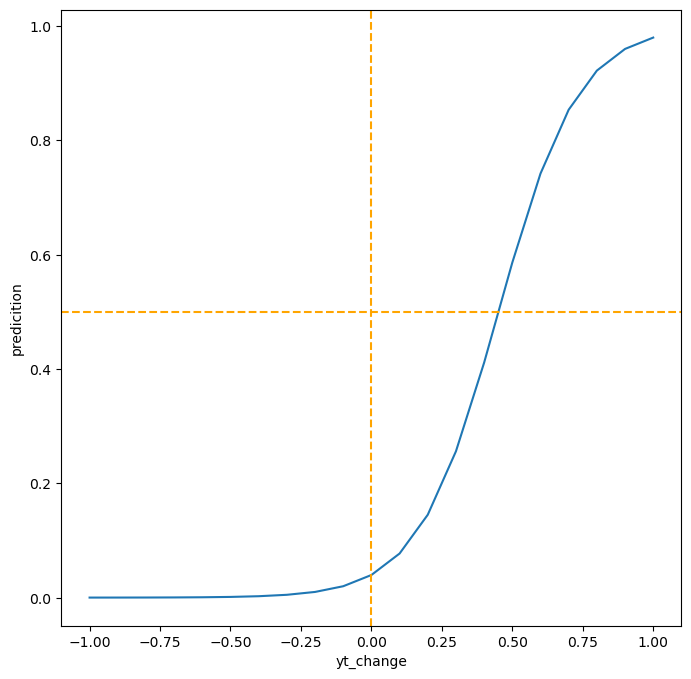

In [255]:
# takeaway summary
ax = sns.lineplot(data= results_1_g_yt, y="predicition", x="yt_change")
# decision point / horizontal line
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

##### for non-gentirifed census tract

In [348]:
test_ng_yt = test_ng.copy()

In [349]:
model_1.predict(test_ng_yt)

63    0.001801
dtype: float64

In [350]:
yt_list_1_ng = [-1, -.9, -.8, -.7, -.6, -.5, -.4,-.3,-.2,-.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
yt_predictions_1_ng = []

In [351]:
for i in yt_list_1_ng:
    testdf = test_ng_yt.copy()
    testdf['yt_change'] = i
    yt_predictions_1_ng.append(model_1.predict(testdf).values[0])  


In [352]:
pd.DataFrame(yt_predictions_1_ng)

,0
0,0.000014
1,0.000029
2,0.000059
3,0.000119
4,0.000242
5,0.000490
6,0.000995
7,0.002016
8,0.004083
9,0.008251


In [353]:
results_1_ng_yt = pd.DataFrame()

In [354]:
results_1_ng_yt['predicition'] = yt_predictions_1_ng
results_1_ng_yt['yt_change'] = yt_list_1_ng

In [355]:
results_1_ng_yt

,predicition,yt_change
0,0.000014,-1.0
1,0.000029,-0.9
2,0.000059,-0.8
3,0.000119,-0.7
4,0.000242,-0.6
5,0.000490,-0.5
6,0.000995,-0.4
7,0.002016,-0.3
8,0.004083,-0.2
9,0.008251,-0.1


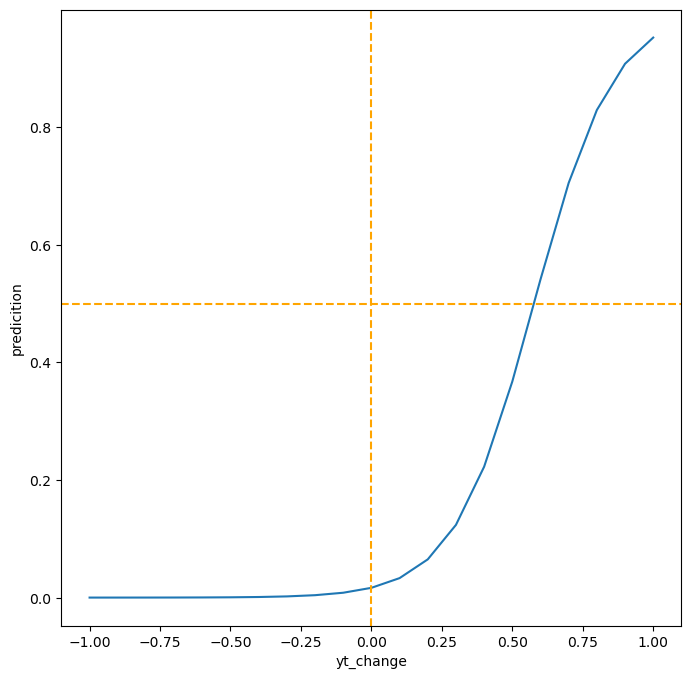

In [356]:
# takeaway summary
ax = sns.lineplot(data= results_1_ng_yt, y="predicition", x="yt_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

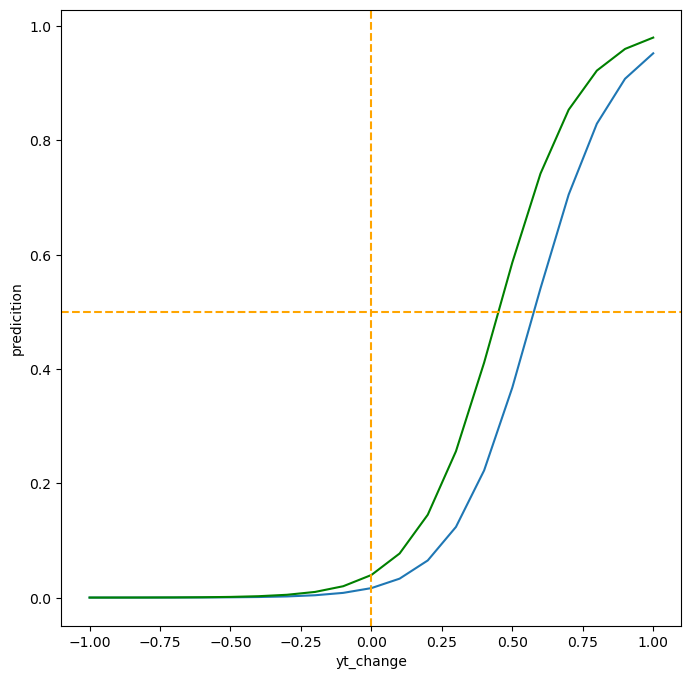

In [420]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_1_ng_yt, y="predicition", x="yt_change", ax=ax)
sns.lineplot(data= results_1_g_yt, y="predicition", x="yt_change", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_1_yt.png', dpi=300)

#### change in household income

##### for gentirfied census tract

In [268]:
test_g_inc_1 = test_g.copy()

In [269]:
model_1.predict(test_g_inc_1)

520    0.044083
dtype: float64

In [270]:
inc_list_1_g = [-75000, -50000, -25000, -10000, -5000, -1500, 0, 1500, 5000, 10000, 25000, 50000, 75000]
inc_predictions_1_g = []

In [271]:
for i in inc_list_1_g:
    testdf = test_g_inc_1.copy()
    testdf['inc_change'] = i
    inc_predictions_1_g.append(model_1.predict(testdf).values[0])  

In [272]:
pd.DataFrame(inc_predictions_1_g)

,0
0,0.076155
1,0.066683
2,0.058316
3,0.053778
4,0.052341
5,0.051357
6,0.050941
7,0.050527
8,0.049575
9,0.048245


In [289]:
results_1_g_inc = pd.DataFrame()

In [290]:
results_1_g_inc['predicition'] = inc_predictions_1_g
results_1_g_inc['inc_change'] = inc_list_1_g
results_1_g_inc

,predicition,inc_change
0,0.076155,-75000
1,0.066683,-50000
2,0.058316,-25000
3,0.053778,-10000
4,0.052341,-5000
5,0.051357,-1500
6,0.050941,0
7,0.050527,1500
8,0.049575,5000
9,0.048245,10000


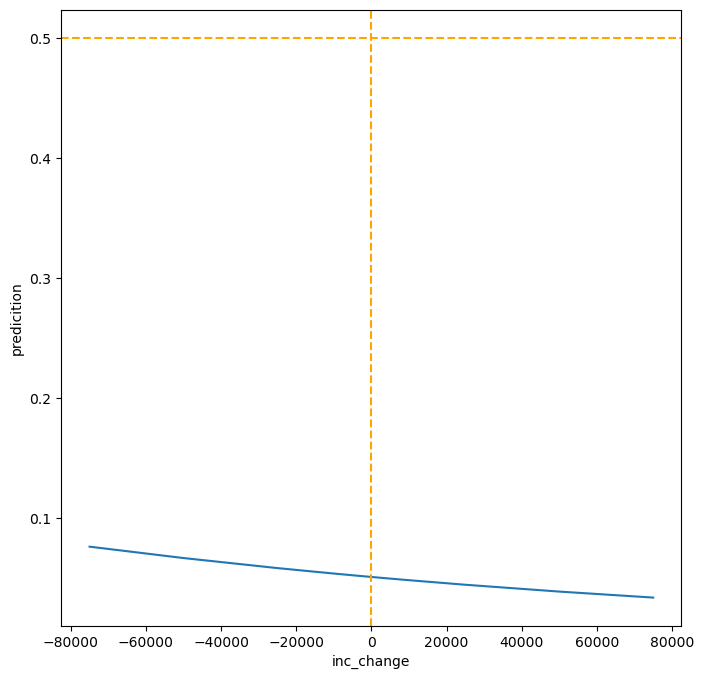

In [292]:
# takeaway summary
ax = sns.lineplot(data= results_1_g_inc, y="predicition", x="inc_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

##### for not gentrified census tract

In [358]:
test_ng_inc = test_ng.copy()

In [359]:
model_1.predict(test_ng_inc)

63    0.001801
dtype: float64

In [360]:
inc_list_1_ng = [-75000, -50000, -25000, -10000, -5000, -1500, 0, 1500, 5000, 10000, 25000, 50000, 75000]
inc_predictions_1_ng = []

In [361]:
for i in inc_list_1_ng:
    testdf = test_ng_inc.copy()
    testdf['inc_change'] = i
    inc_predictions_1_ng.append(model_1.predict(testdf).values[0])  

In [362]:
pd.DataFrame(inc_predictions_1_ng)

,0
0,0.002709
1,0.002349
2,0.002037
3,0.001870
4,0.001817
5,0.001781
6,0.001766
7,0.001751
8,0.001716
9,0.001668


In [363]:
results_1_ng_inc = pd.DataFrame()

In [364]:
results_1_ng_inc['predicition'] = inc_predictions_1_ng
results_1_ng_inc['inc_change'] = inc_list_1_ng
results_1_ng_inc

,predicition,inc_change
0,0.002709,-75000
1,0.002349,-50000
2,0.002037,-25000
3,0.001870,-10000
4,0.001817,-5000
5,0.001781,-1500
6,0.001766,0
7,0.001751,1500
8,0.001716,5000
9,0.001668,10000


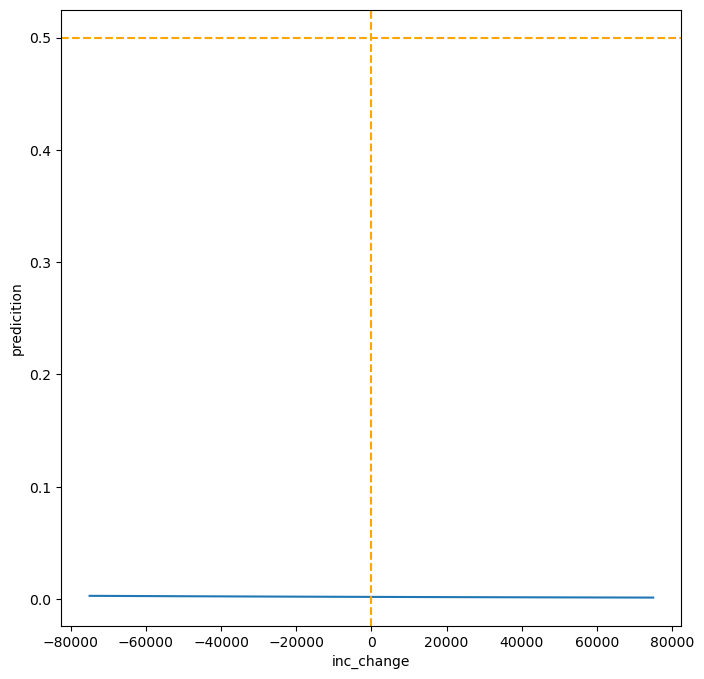

In [365]:
# takeaway summary
ax = sns.lineplot(data= results_1_ng_inc, y="predicition", x="inc_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

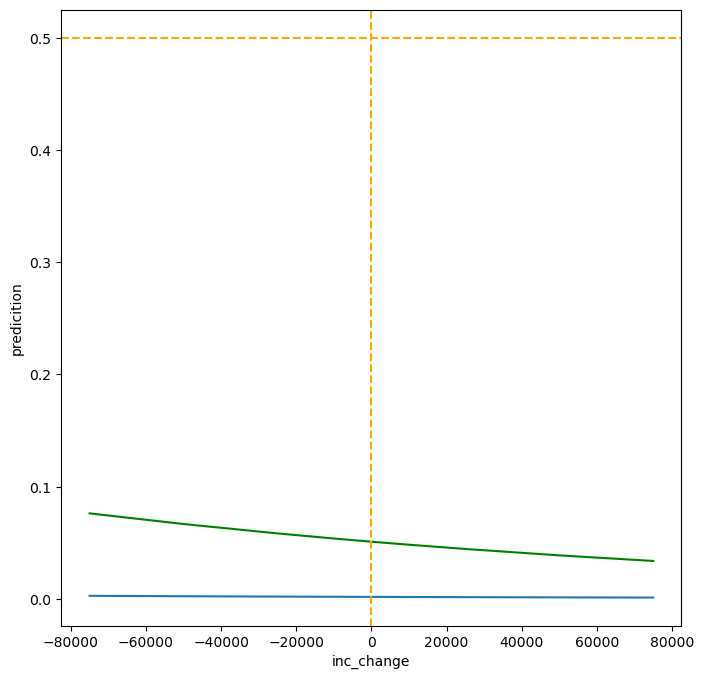

In [421]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_1_ng_inc, y="predicition", x="inc_change", ax=ax)
sns.lineplot(data= results_1_g_inc, y="predicition", x="inc_change", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_1_inc.png', dpi=300)

#### number of new buildings per square mile

##### for gentirfied census tract

In [293]:
test_g_built = test_g.copy()

In [294]:
model_1.predict(test_g_built)

520    0.044083
dtype: float64

In [296]:
# building a 'new_built' list
built_list_1_g = list(range(0,15000, 100))
built_predictions = []

In [297]:
for i in built_list_1_g:
    testdf = test_g_built.copy()
    testdf['new_built'] = i
    built_predictions.append(model_1.predict(testdf).values[0])  

In [298]:
results_1_g_nb = pd.DataFrame()

In [299]:
results_1_g_nb['predicition'] = built_predictions
results_1_g_nb['new_built'] = built_list_1_g
results_1_g_nb

,predicition,new_built
0,0.015678,0
1,0.016165,100
2,0.016668,200
3,0.017186,300
4,0.017720,400
...,...,...
145,0.592722,14500
146,0.600216,14600
147,0.607664,14700
148,0.615062,14800


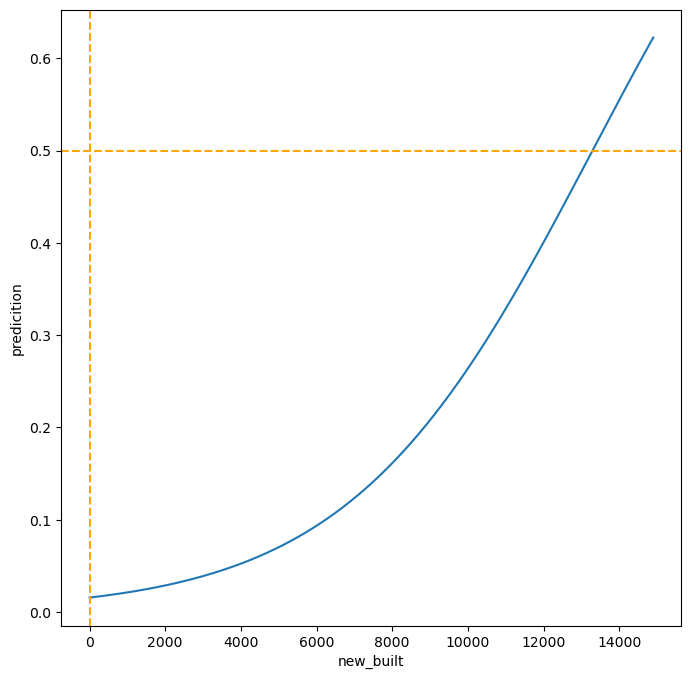

In [300]:
# takeaway summary
ax = sns.lineplot(data= results_1_g_nb, y="predicition", x="new_built")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

#### for not gentrified census tract 

In [367]:
test_ng_built = test_ng.copy()

In [368]:
# building a 'new_built' list
built_list_1_ng = list(range(0,15000, 100))
built_predictions_1_ng = []

In [369]:
for i in built_list_1_ng:
    testdf = test.copy()
    testdf['new_built'] = i
    built_predictions_1_ng.append(model_1.predict(testdf).values[0]) 

In [370]:
results_1_ng_nb = pd.DataFrame()

In [371]:
results_1_ng_nb['predicition'] = built_predictions_1_ng
results_1_ng_nb['new_built'] = built_list_1_ng
results_1_ng_nb

,predicition,new_built
0,0.014302,0
1,0.014748,100
2,0.015207,200
3,0.015680,300
4,0.016168,400
...,...,...
145,0.570035,14500
146,0.577649,14600
147,0.585227,14700
148,0.592764,14800


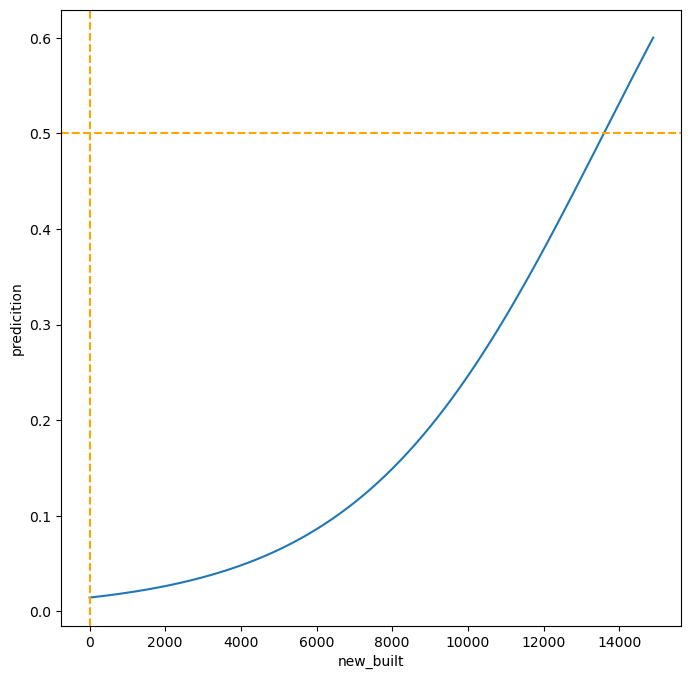

In [372]:
# takeaway summary
ax = sns.lineplot(data= results_1_ng_nb, y="predicition", x="new_built")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

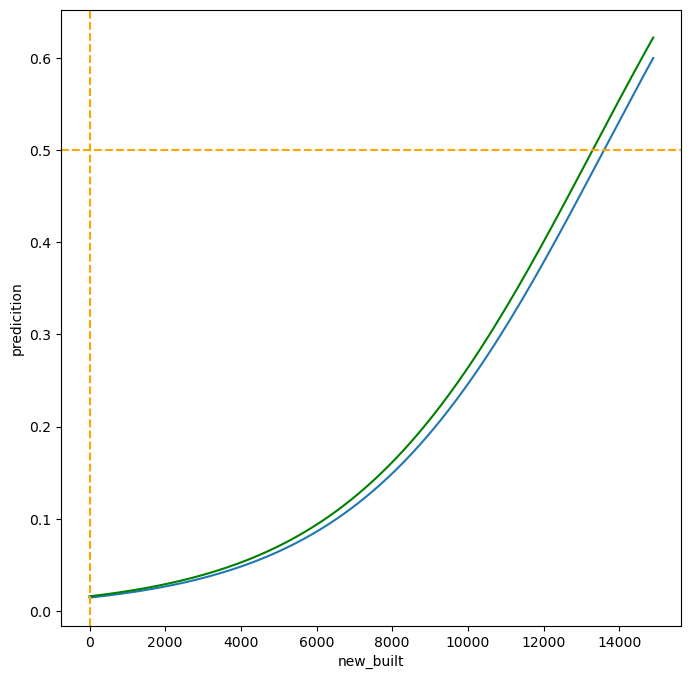

In [422]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_1_ng_nb, y="predicition", x="new_built", ax=ax)
sns.lineplot(data= results_1_g_nb, y="predicition", x="new_built", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_1_nb.png', dpi=300)

## Model 2: FRESH_ZONE BROOKLYN MODEL

In [50]:
formula_2 = "fresh_zone ~ inc_change + yt_change + new_built"
model_2 = smf.logit(formula_2, data=bk_indicators_no_null).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.618845
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fresh_zone   No. Observations:                  745
Model:                          Logit   Df Residuals:                      741
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 May 2023   Pseudo R-squ.:                 0.05380
Time:                        12:44:49   Log-Likelihood:                -461.04
converged:                       True   LL-Null:                       -487.25
Covariance Type:            nonrobust   LLR p-value:                 2.425e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2528      0.091     -2.783      0.005      -0.431      -0.075
inc_change -3.304e-05   5.31e-06     -6.226      0.000   -4.34e-05   -2.26e-05
yt_change      2.2769      0.758      3.003      0.003       0.791       3.763
new_built  -4.265e-05      0.000     -0.335      0.738      -0.000       0.000
==============================================================================
"""

In [221]:
# create a confusion matrix of fresh_zone model
model_1.pred_table()
# true negative = 428
# false positive = 48
# false negative = 217
# true positive = 52
# sum of the true > sum of the false 

array([[428.,  48.],
       [217.,  52.]])

In [120]:
# interpreting logisitic regression results 
np.exp(2.2524)

9.510533748917862

In [ ]:
# if you had a census tract go from 0% to 100% white, than it is 9.5 times more likely that a fresh zone would be denoted in a given census tract.
# hard to quantify in an applied urban planning setting  

### testing the fresh_zone model on demographic characteristics 

#### change in % white population

##### gentrified census tract

In [329]:
test_g_yt_2 = test_g.copy()

In [316]:
model_2.predict(test_g_yt_2)

520    0.044083
dtype: float64

In [330]:
# create a for loop that tests likelihood of a fresh zone based on incremental changes in yt_change variable 
yt_list_2_g = [-1, -.9, -.8, -.7, -.6, -.5, -.4,-.3,-.2,-.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
predictions_2_g_yt = []

In [331]:
for i in yt_list_2_g:
    testdf = test_g_yt_2.copy()
    testdf['yt_change'] = i
    predictions_2_g_yt.append(model_2.predict(testdf).values[0])  
                                 

In [332]:
results_2_g_yt = pd.DataFrame()

In [333]:
results_2_g_yt['predicition'] = predictions_2_g_yt
results_2_g_yt['yt_change'] = yt_list_2_g
results_2_g_yt

,predicition,yt_change
0,0.000035,-1.0
1,0.000071,-0.9
2,0.000143,-0.8
3,0.000291,-0.7
4,0.000589,-0.6
5,0.001195,-0.5
6,0.002423,-0.4
7,0.004904,-0.3
8,0.009901,-0.2
9,0.019889,-0.1


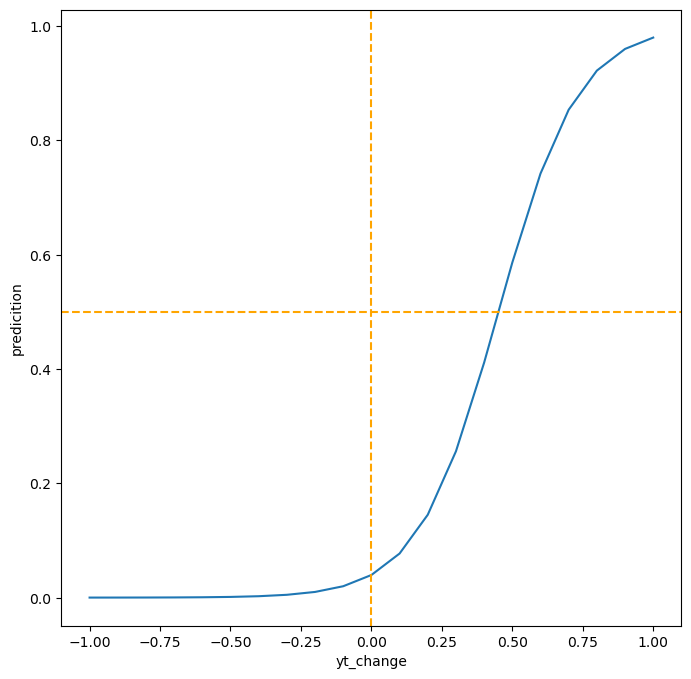

In [334]:
# takeaway summary
ax = sns.lineplot(data= results_2_g_yt, y="predicition", x="yt_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

##### not gentrified census tract

In [374]:
test_ng_yt_2 = test_ng.copy()

In [375]:
yt_list_2_ng = [-1, -.9, -.8, -.7, -.6, -.5, -.4,-.3,-.2,-.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
predictions_2_ng_yt = []

In [376]:
for i in yt_list_2_ng:
    testdf = test_ng_yt_2 .copy()
    testdf['yt_change'] = i
    predictions_2_ng_yt.append(model_2.predict(testdf).values[0])  

In [377]:
results_2_ng_yt = pd.DataFrame()

In [378]:
results_2_ng_yt['predicition'] = predictions_2_ng_yt
results_2_ng_yt['yt_change'] = yt_list_2_ng
results_2_ng_yt

,predicition,yt_change
0,0.000014,-1.0
1,0.000029,-0.9
2,0.000059,-0.8
3,0.000119,-0.7
4,0.000242,-0.6
5,0.000490,-0.5
6,0.000995,-0.4
7,0.002016,-0.3
8,0.004083,-0.2
9,0.008251,-0.1


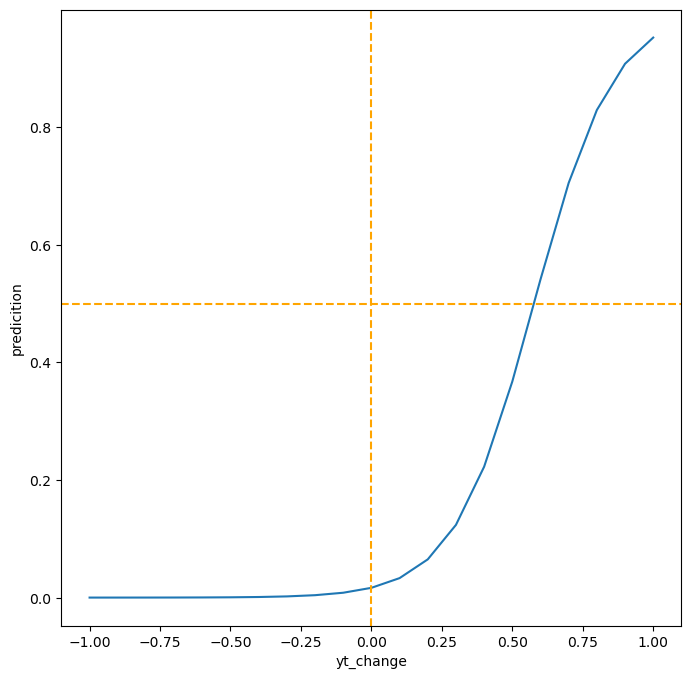

In [379]:
# takeaway summary
ax = sns.lineplot(data= results_2_ng_yt, y="predicition", x="yt_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

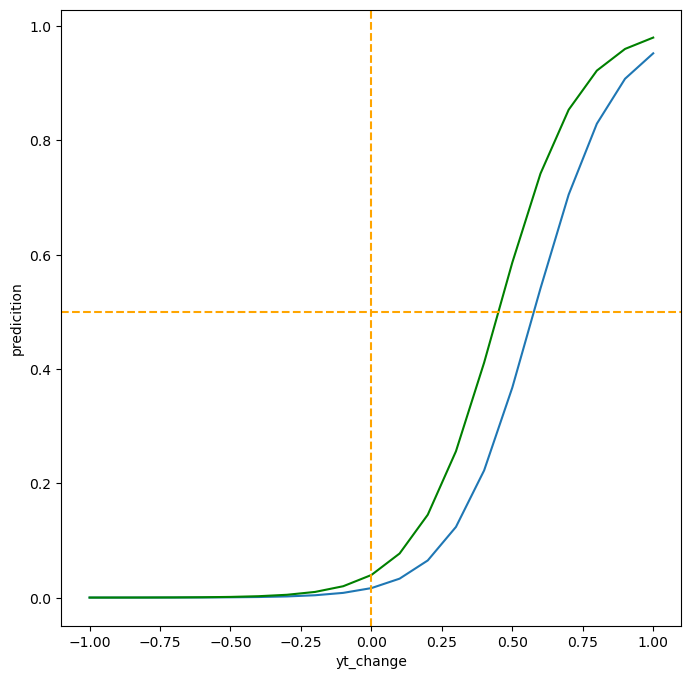

In [423]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_2_ng_yt, y="predicition", x="yt_change", ax=ax)
sns.lineplot(data= results_2_g_yt, y="predicition", x="yt_change", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_2_yt.png', dpi=300)

#### change in household income

In [280]:
bk_indicators_no_null['inc_change'].describe()

count      745.000000
mean     10107.093200
std      17328.491386
min     -52976.478000
25%      -1538.204000
50%       8374.121000
75%      19557.736000
max      71385.750000
Name: inc_change, dtype: float64

##### gentrified census tract

In [381]:
test_g_2_inc = test_g.copy()

In [382]:
inc_list_2_g = [-75000, -50000, -25000, -10000, -5000, -1500, 0, 1500, 5000, 10000, 25000, 50000, 75000]
inc_predictions_2_g = []

In [383]:
for i in inc_list_2_g:
    testdf = test_g_2_inc.copy()
    testdf['inc_change'] = i
    inc_predictions_2_g.append(model_1.predict(testdf).values[0])  

In [384]:
results_2_g_inc = pd.DataFrame()

In [385]:
results_2_g_inc['inc_prediction'] = inc_predictions_2_g
results_2_g_inc['inc_change'] = inc_list_2_g
results_2_g_inc

,inc_prediction,inc_change
0,0.076155,-75000
1,0.066683,-50000
2,0.058316,-25000
3,0.053778,-10000
4,0.052341,-5000
5,0.051357,-1500
6,0.050941,0
7,0.050527,1500
8,0.049575,5000
9,0.048245,10000


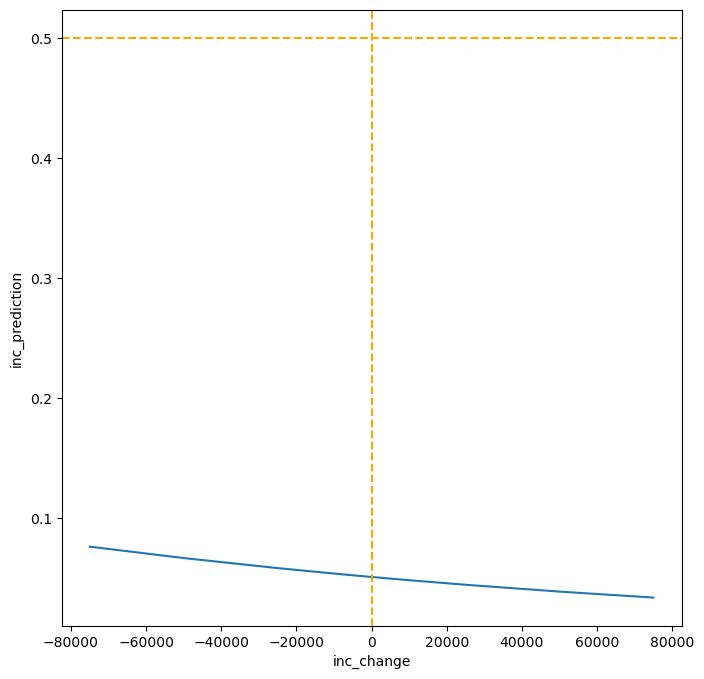

In [395]:
# as household income increases, the census tract becomes less likely to be considered in a fresh zone
ax = sns.lineplot(data= results_2_g_inc, y="inc_prediction", x="inc_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

##### not gentrified census tract 

In [390]:
test_ng_2_inc = test_g.copy()

In [389]:
inc_list_2_ng = [-75000, -50000, -25000, -10000, -5000, -1500, 0, 1500, 5000, 10000, 25000, 50000, 75000]
inc_predictions_2_ng = []

In [391]:
for i in inc_list_2_ng:
    testdf = test_ng_2_inc.copy()
    testdf['inc_change'] = i
    inc_predictions_2_ng.append(model_1.predict(testdf).values[0]) 

In [392]:
results_2_ng_inc = pd.DataFrame()

In [393]:
results_2_ng_inc['inc_prediction'] = inc_predictions_2_ng
results_2_ng_inc['inc_change'] = inc_list_2_ng
results_2_ng_inc

,inc_prediction,inc_change
0,0.076155,-75000
1,0.066683,-50000
2,0.058316,-25000
3,0.053778,-10000
4,0.052341,-5000
5,0.051357,-1500
6,0.050941,0
7,0.050527,1500
8,0.049575,5000
9,0.048245,10000


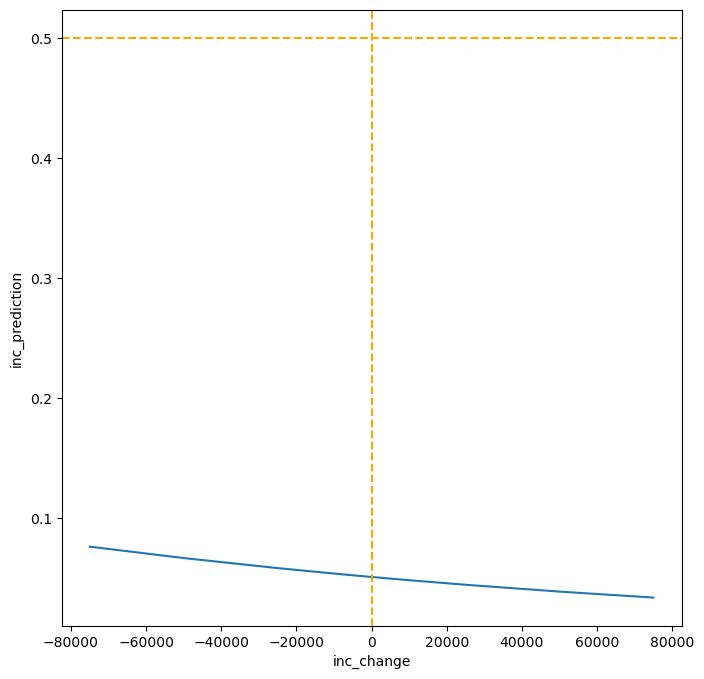

In [396]:
# as household income increases, the census tract becomes less likely to be considered in a fresh zone
ax = sns.lineplot(data= results_2_ng_inc, y="inc_prediction", x="inc_change")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

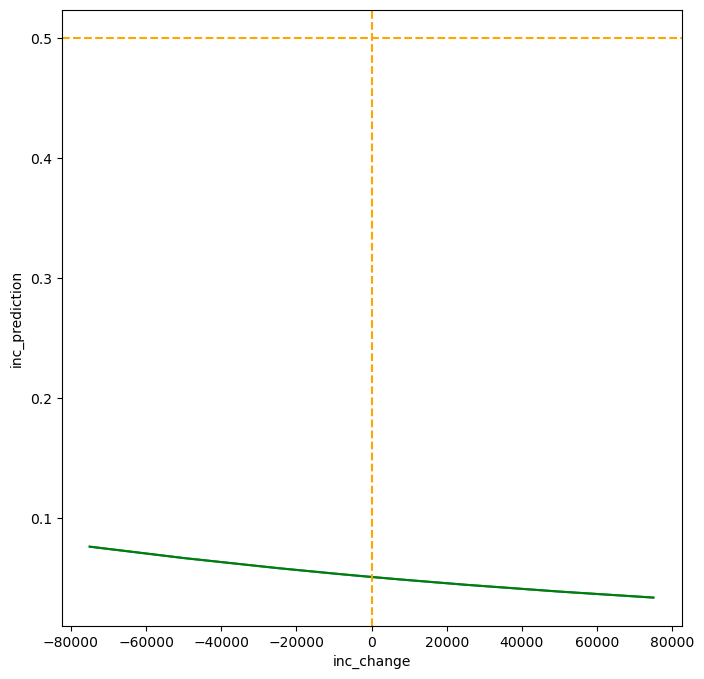

In [424]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_2_ng_inc, y="inc_prediction", x="inc_change", ax=ax)
sns.lineplot(data= results_2_g_inc, y="inc_prediction", x="inc_change", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_2_inc.png', dpi=300)

### number of new buildings per square mile

In [289]:
bk_indicators_no_null['new_built'].describe()

count      745.000000
mean       258.221009
std        793.166734
min          0.000000
25%          0.000000
50%          0.000000
75%        197.438799
max      10998.521337
Name: new_built, dtype: float64

##### gentrified census tract

In [399]:
test_2_g_nb = test_g.copy()

In [400]:
# building a 'new_built' list
nb_list_2_g = list(range(0,15000, 100))
nb_predictions_2_g = []

In [401]:
for i in nb_list_2_g:
    testdf = test_2_g_nb.copy()
    testdf['new_built'] = i
    nb_predictions_2_g.append(model_1.predict(testdf).values[0])  

In [405]:
results_2_g_nb = pd.DataFrame()

In [406]:
results_2_g_nb['predicition'] = nb_predictions_2_g
results_2_g_nb['new_built'] = nb_list_2_g
results_2_g_nb

,predicition,new_built
0,0.015678,0
1,0.016165,100
2,0.016668,200
3,0.017186,300
4,0.017720,400
...,...,...
145,0.592722,14500
146,0.600216,14600
147,0.607664,14700
148,0.615062,14800


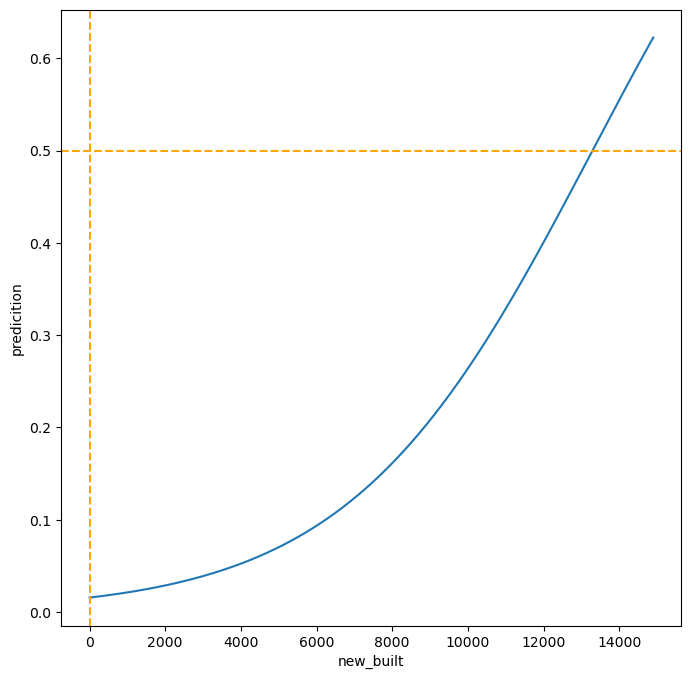

In [407]:
# takeaway summary
ax = sns.lineplot(data= results_2_g_nb, y="predicition", x="new_built")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

##### non gentrified census tract

In [408]:
test_2_ng_nb = test_ng.copy()

In [409]:
# building a 'new_built' list
nb_list_2_ng = list(range(0,15000, 100))
nb_predictions_2_ng = []

In [410]:
for i in nb_list_2_ng:
    testdf = test_2_ng_nb.copy()
    testdf['new_built'] = i
    nb_predictions_2_ng.append(model_1.predict(testdf).values[0])  

In [414]:
results_2_ng_nb = pd.DataFrame()

In [415]:
results_2_ng_nb['prediction'] = nb_predictions_2_ng
results_2_ng_nb['new_built'] = nb_list_2_ng
results_2_ng_nb

,prediction,new_built
0,0.001801,0
1,0.001858,100
2,0.001916,200
3,0.001977,300
4,0.002039,400
...,...,...
145,0.141523,14500
146,0.145348,14600
147,0.149259,14700
148,0.153256,14800


In [213]:
built_results.query('build_prediction < 0.502').head()

,build_prediction,build_change
123,0.501273,12300
124,0.500207,12400
125,0.499140,12500
126,0.498074,12600
127,0.497008,12700


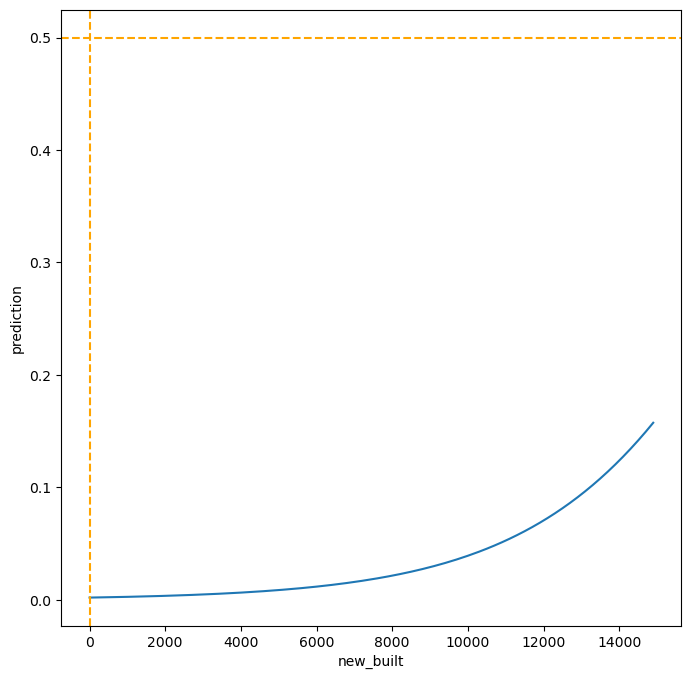

In [417]:
# takeaway summary
ax = sns.lineplot(data= results_2_ng_nb, y="prediction", x="new_built")
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")

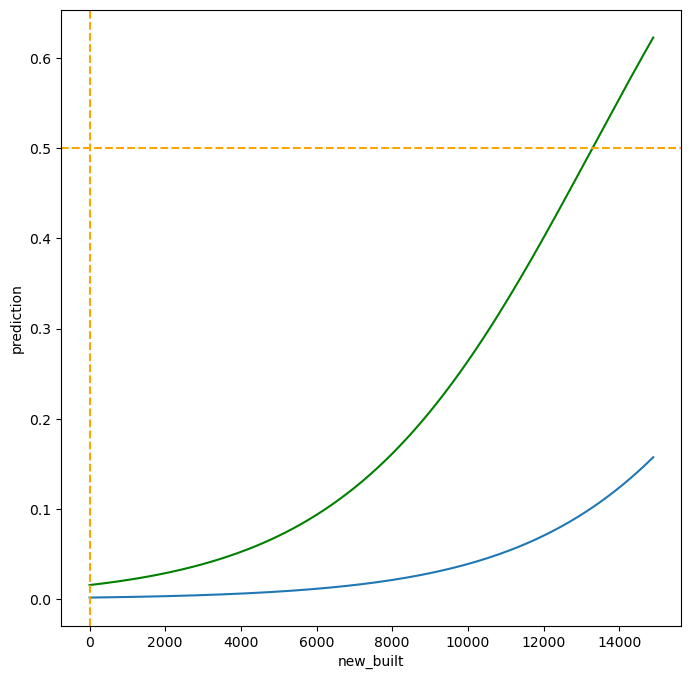

In [425]:
# takeaway summary final
fig, ax = plt.subplots()
sns.lineplot(data= results_2_ng_nb, y="prediction", x="new_built", ax=ax)
sns.lineplot(data= results_2_g_nb, y="predicition", x="new_built", color="green", ax=ax)
ax.axhline(y=0.5, linestyle='--', color="orange")
ax.axvline(x=0, linestyle="--", color="orange")
plt.savefig('../stats/results_2_nb.png', dpi=300)

## MODEL 3: FRESH_STORE BED-STUY MODEL (FAIL)

In [ ]:
# when trying to identify this problem at a smaller scale, statistical significance is lost.
# ecological facllacy: https://en.wikipedia.org/wiki/Ecological_fallacy

In [60]:
# create fresh stores per square mile column
bs_indicators.head()
bs_indicators['fresh_store_norm'] = bs_indicators['num_stores_x'] / bs_indicators['area_x']

C:\Users\abeme\miniconda3_2\envs\info615\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [61]:
bs_indicators_no_null = bs_indicators.dropna(subset=['yt_change', 'inc_change', 'new_built'])

In [223]:
# logistic reg pt.2: from bs_indicators, where y is fresh_store and x is inc_change, yt_change, 2014built
formula_3 = "fresh_zone ~ inc_change + yt_change + new_built"
model_3 = smf.logit(formula_3, data=bs_indicators_no_null).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.635386
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fresh_zone   No. Observations:                   66
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 May 2023   Pseudo R-squ.:                 0.03066
Time:                        16:48:45   Log-Likelihood:                -41.936
converged:                       True   LL-Null:                       -43.262
Covariance Type:            nonrobust   LLR p-value:                    0.4483
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0648      0.491      2.167      0.030       0.102       2.028
inc_change -2.996e-05   2.08e-05     -1.442      0.149   -7.07e-05    1.08e-05
yt_change     -0.7537      2.625     -0.287      0.774      -5.899       4.392
new_built   3.796e-07      0.000      0.001      0.999      -0.001       0.001
==============================================================================
"""

In [62]:
# logistic reg pt.2: from bs_indicators, where y is fresh_store and x is inc_change, yt_change, 2014built
formula_4 = "fresh_store ~ inc_change + yt_change + new_built"
model_4 = smf.logit(formula_2, data=bs_indicators_no_null).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.366770
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fresh_store   No. Observations:                   66
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 May 2023   Pseudo R-squ.:                0.006940
Time:                        14:46:18   Log-Likelihood:                -24.207
converged:                       True   LL-Null:                       -24.376
Covariance Type:            nonrobust   LLR p-value:                    0.9527
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1015      0.709     -2.966      0.003      -3.490      -0.713
inc_change   9.09e-06   2.98e-05      0.305      0.761   -4.94e-05    6.75e-05
yt_change      0.9897      3.866      0.256      0.798      -6.588       8.567
new_built     -0.0002      0.001     -0.362      0.717      -0.002       0.001
==============================================================================
"""

In [222]:
model_2.pred_table()

array([[58.,  0.],
       [ 8.,  0.]])

#### testing the bedstuy fresh_store model on demographic characteristics 

In [ ]:
# not needed, statsistical model is not significant. 

In [ ]:
# this notebook covered local morans I statistic for fresh stores, as well as census sensitivity analyses of logisitic regression models. 